In [ ]:
!cp -R '/content/drive/My Drive/Text Mercato/pics.zip' /content

In [ ]:
!unzip /content/pics.zip

Archive:  /content/pics.zip
   creating: pics/
  inflating: pics/free-hm-kash-1023-m-s-retail-original-imafh9cvv8t4wycu.jpeg  
   creating: __MACOSX/
   creating: __MACOSX/pics/
  inflating: __MACOSX/pics/._free-hm-kash-1023-m-s-retail-original-imafh9cvv8t4wycu.jpeg  
  inflating: pics/free-sari-5-mithark-original-imafm5hgeyeehvtu.jpeg  
  inflating: __MACOSX/pics/._free-sari-5-mithark-original-imafm5hgeyeehvtu.jpeg  
  inflating: pics/m-pr343white-prakhya-original-imafj5awvx26z9hq.jpeg  
  inflating: __MACOSX/pics/._m-pr343white-prakhya-original-imafj5awvx26z9hq.jpeg  
  inflating: pics/l-rs19stkt-b-rope-original-imafeeuhwywtgzwy.jpeg  
  inflating: __MACOSX/pics/._l-rs19stkt-b-rope-original-imafeeuhwywtgzwy.jpeg  
  inflating: pics/m-black-gown-pavitra-original-imafn9dhf4fs94gt.jpeg  
  inflating: __MACOSX/pics/._m-black-gown-pavitra-original-imafn9dhf4fs94gt.jpeg  
  inflating: pics/xxl-black-gown-pavitra-original-imafn9dhjk9dayx5.jpeg  
  inflating: __MACOSX/pics/._xxl-black-gown-p

In [1]:
from utils import extract_features
from utils import pred_AgglomerativeClustering, pred_KMeans
from utils import get_vgg19, get_resnet50 
from silhouette_scores import plot_avg_silhouette_score_and_get_cluster_with_max_score

Using TensorFlow backend.


In [2]:
'''

            FIRST WITH : FEATURES EXTRACTED FROM VGG 19

'''

'\n\n            FIRST WITH : FEATURES EXTRACTED FROM VGG 19\n\n'

In [3]:
# 1
vgg19, preprocess_input_vgg19 = get_vgg19()
vgg19.summary()                        # Its included top is false 

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [4]:
# Extract features using vgg19 #
img_dir_path = '/content/pics'
model = vgg19
preprocess_input = preprocess_input_vgg19

extracted_features = extract_features(img_dir_path, model, preprocess_input)

extracted_features.shape

(20, 25088)

In [5]:
# TRIED 2 CLUSTERING METHOD [KMeans and AgglomerativeClustering (as it assumed to be better for small dataset)] AND FIND SILHOUETTE SCORE WITH DIFF NUMBERS OF CLUSTERS, TO GET THE BEST ONE

In [6]:
clusters = [3,4,5,6,7,8,9]

With VGG19 for features extraction, and KMeans, Clusters with max avg silhouette score 6, Max avg silouette score 0.19087500870227814


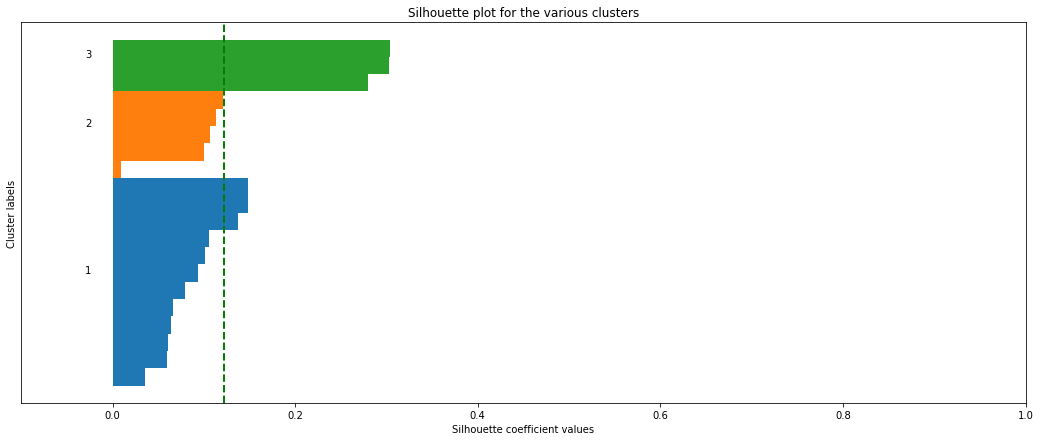

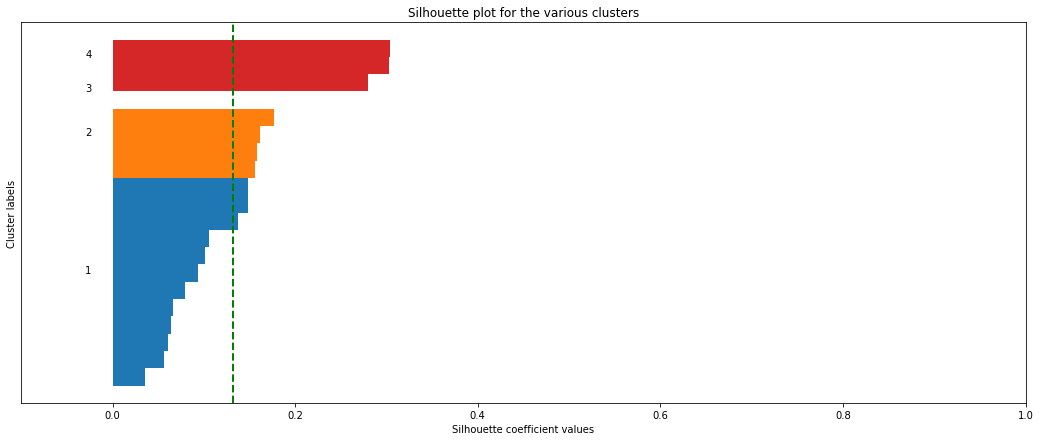

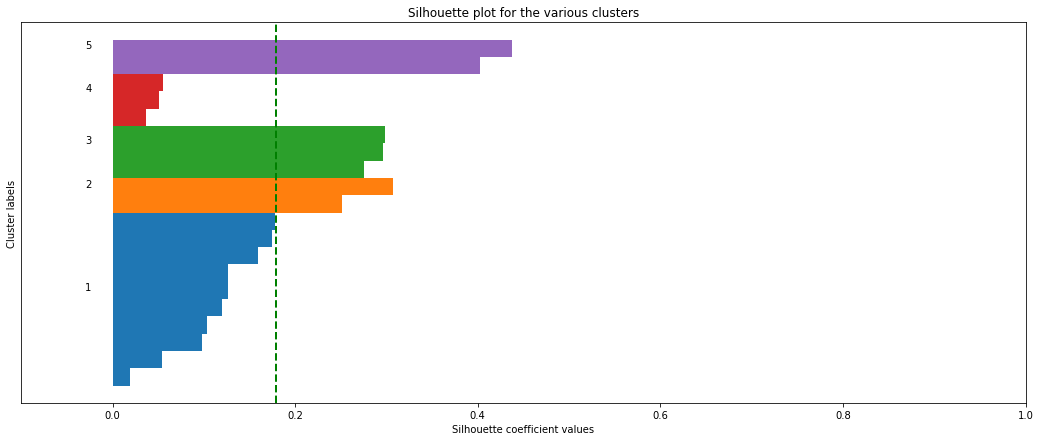

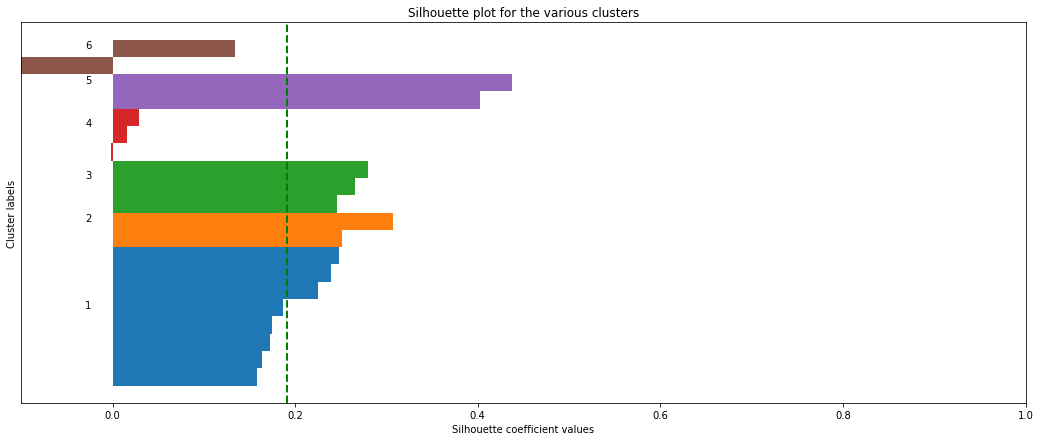

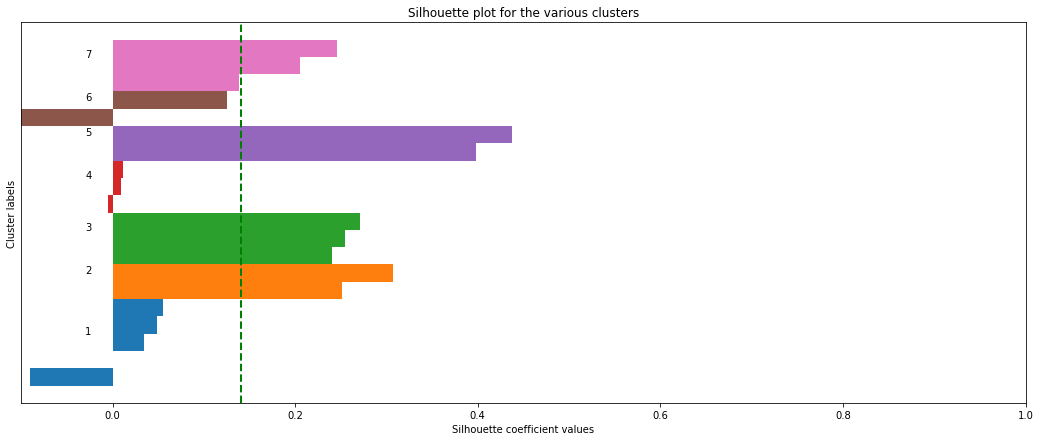

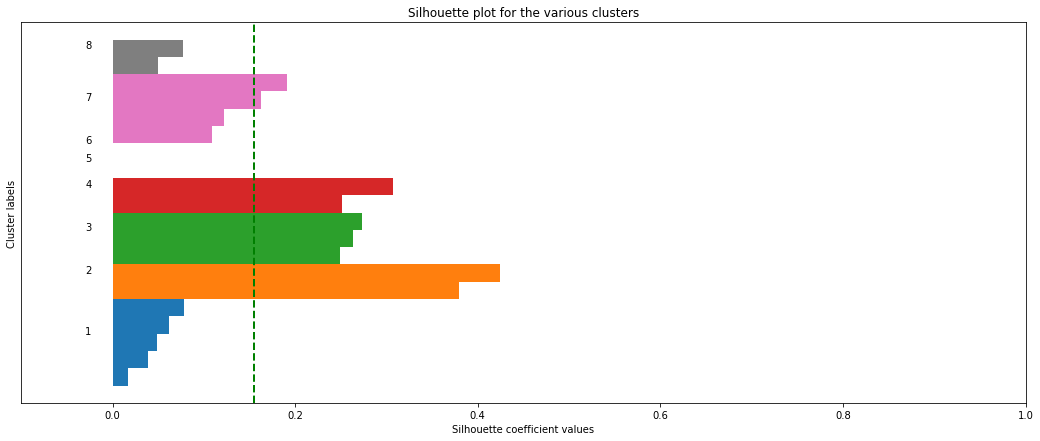

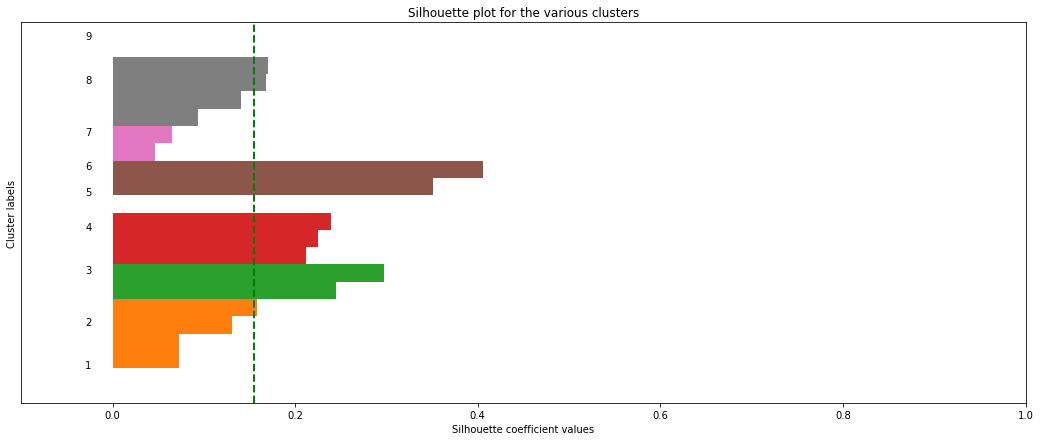

In [7]:
# 1.1 WITH KMeans

clustering_method = 'KMeans'
features = extracted_features


clusters_with_max_avg_score, max_avg_score = plot_avg_silhouette_score_and_get_cluster_with_max_score(clustering_method, features, clusters)

print(f'With VGG19 for features extraction, and KMeans, Clusters with max avg silhouette score {clusters_with_max_avg_score}, Max avg silouette score {max_avg_score}')

With VGG19 for features extraction, and AgglomerativeClustering, Clusters with max avg silhouette score 7, Max avg silouette score 0.19320611655712128


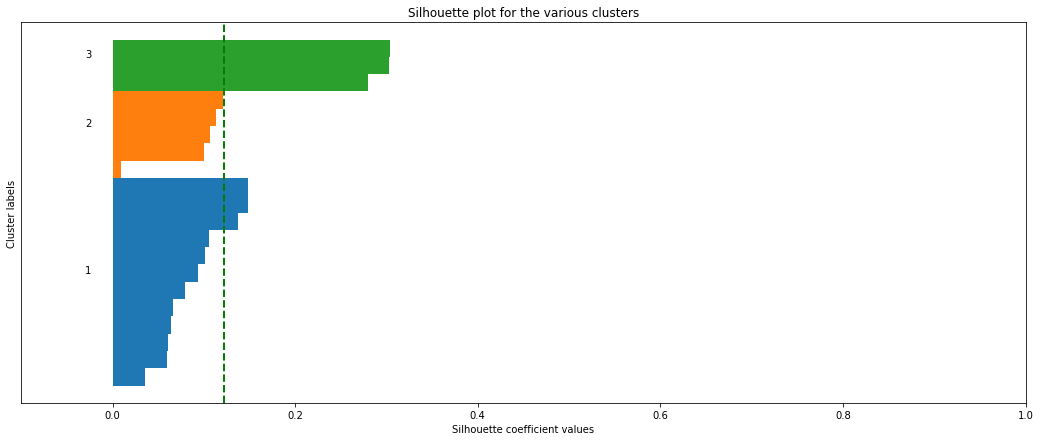

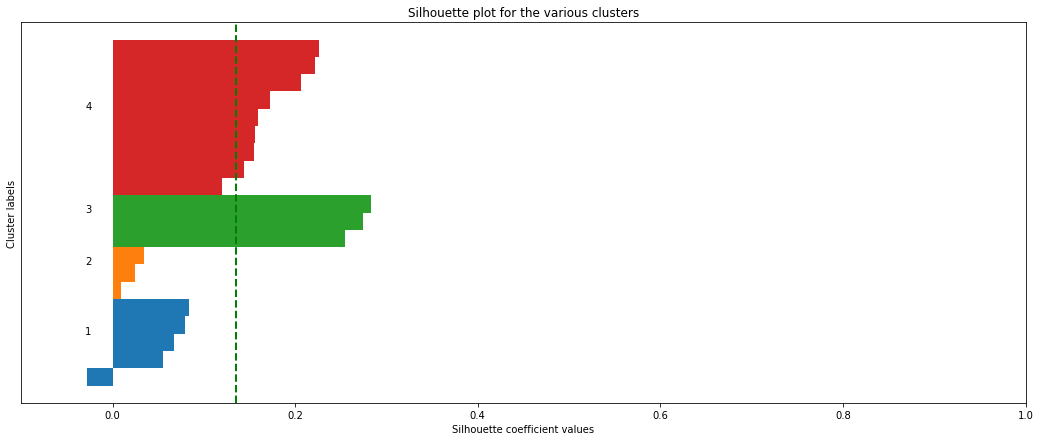

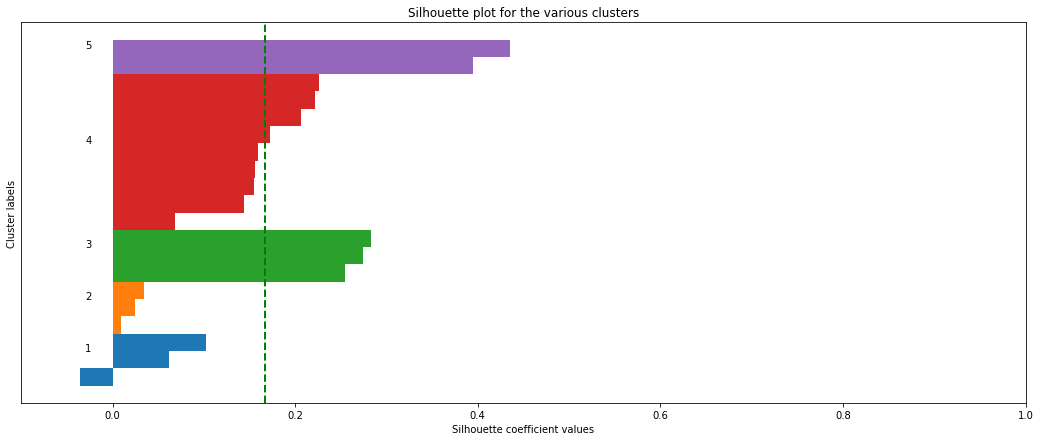

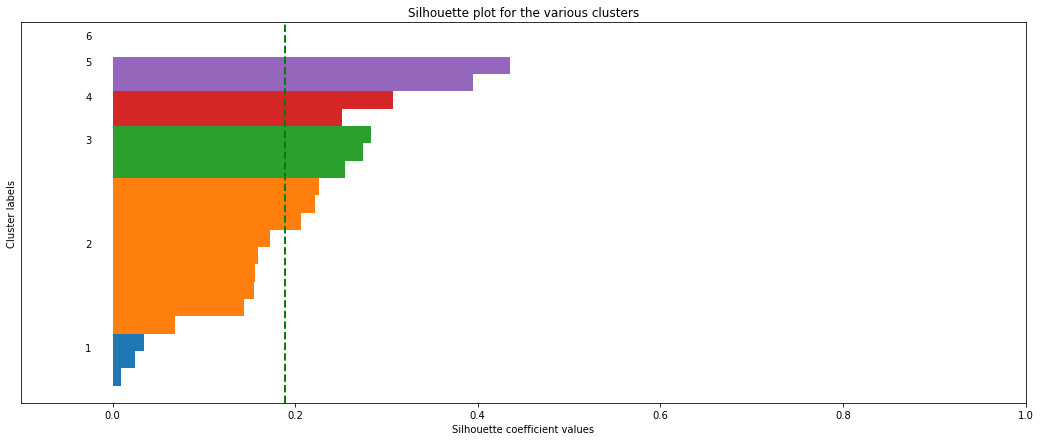

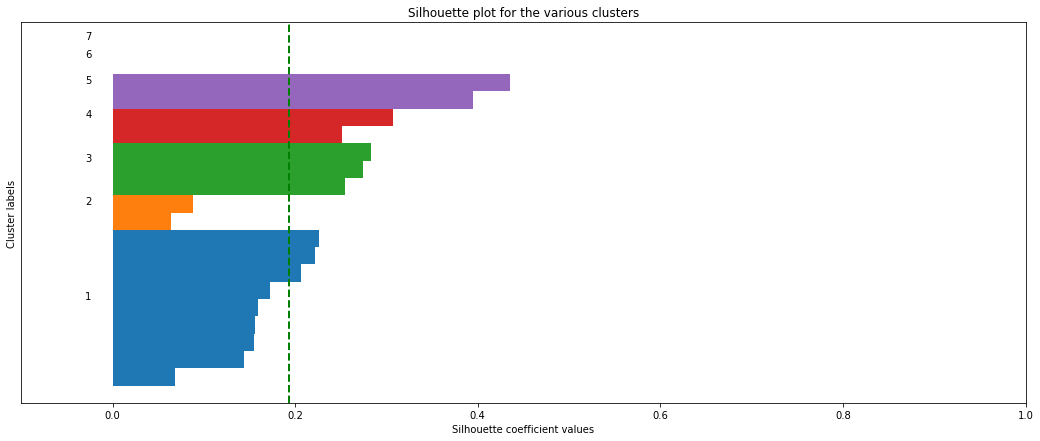

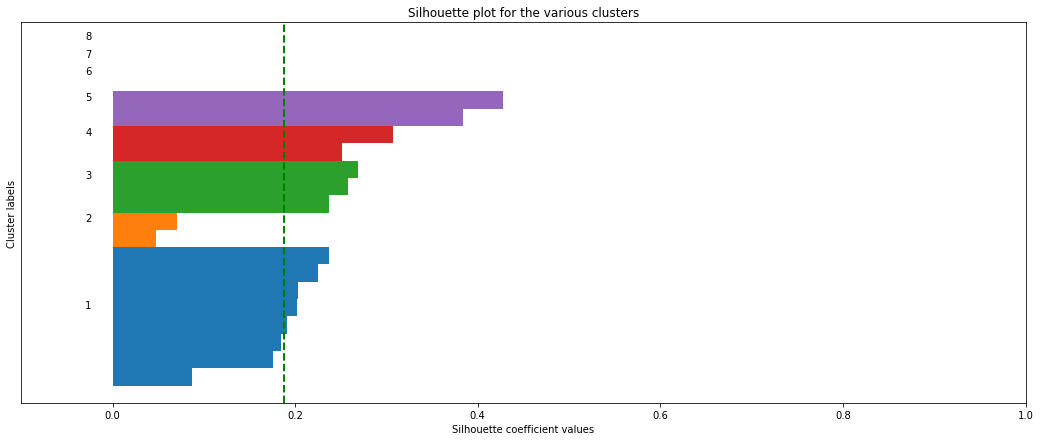

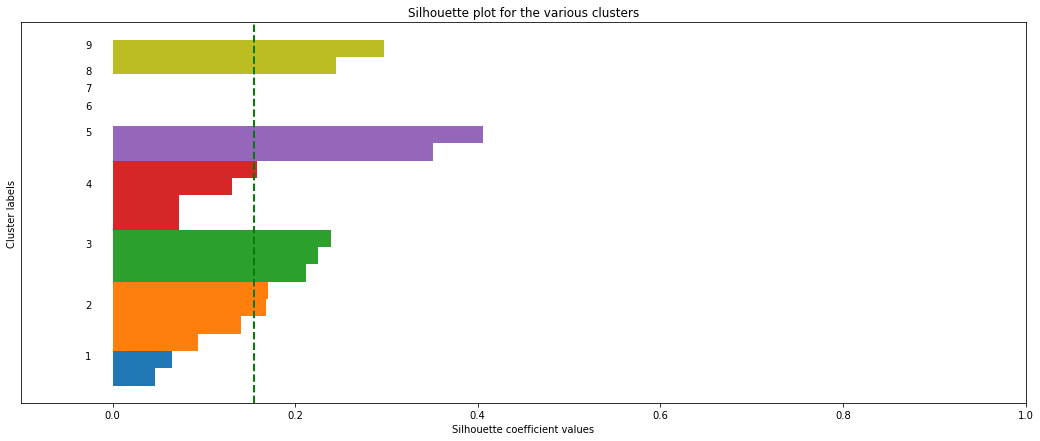

In [8]:
# 1.2 WITH AgglomerativeClustering

clustering_method = 'AgglomerativeClustering'
features = extracted_features


clusters_with_max_avg_score, max_avg_score = plot_avg_silhouette_score_and_get_cluster_with_max_score(clustering_method, features, clusters)

print(f'With VGG19 for features extraction, and AgglomerativeClustering, Clusters with max avg silhouette score {clusters_with_max_avg_score}, Max avg silouette score {max_avg_score}')

In [9]:
'''

            SECOND WITH : FEATURES EXTRACTED FROM RESNET 50

'''

'\n\n            SECOND WITH : FEATURES EXTRACTED FROM RESNET 50\n\n'

In [10]:
# 2
resnet50, preprocess_input_resnet50 = get_resnet50()
resnet50.summary()                        # Its included top is false, and added a avg pool layer at last

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
# Extract features using resnet50 #
img_dir_path = '/content/pics'
model = resnet50
preprocess_input = preprocess_input_resnet50

extracted_features = extract_features(img_dir_path, model, preprocess_input)

extracted_features.shape

(20, 2048)

In [12]:
# TRIED 2 CLUSTERING METHOD [KMeans and AgglomerativeClustering (as it assumed to be better for small dataset)] AND FIND SILHOUETTE SCORE WITH DIFF NUMBERS OF CLUSTERS, TO GET THE BEST ONE

In [13]:
clusters = [3,4,5,6,7,8,9]

With ResNet50 for features extraction, and KMeans, Clusters with max avg silhouette score 7, Max avg silouette score 0.31846266984939575


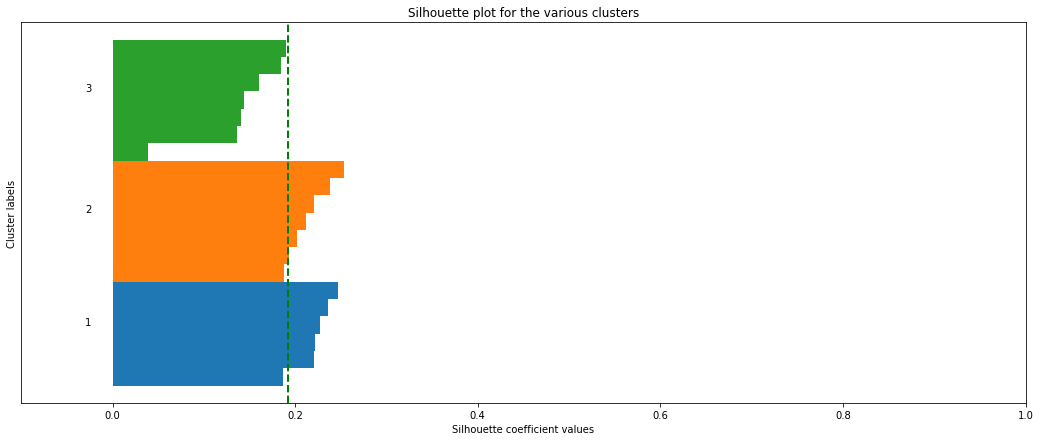

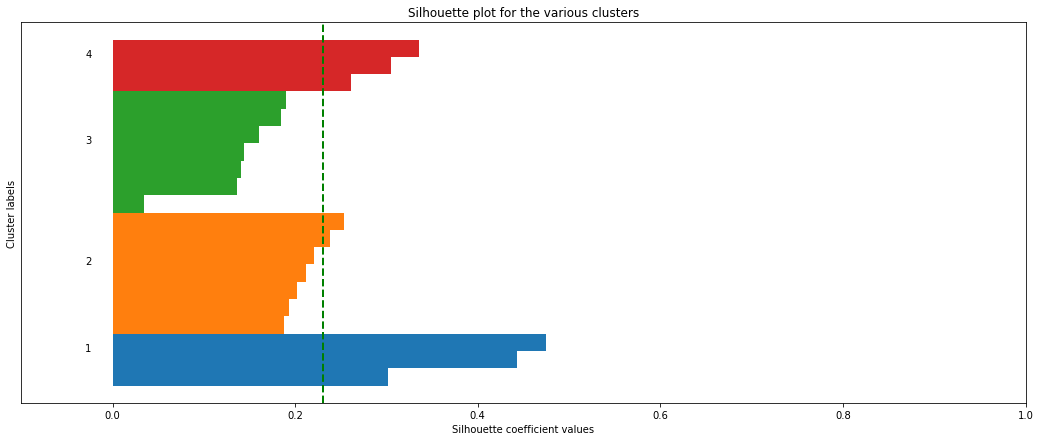

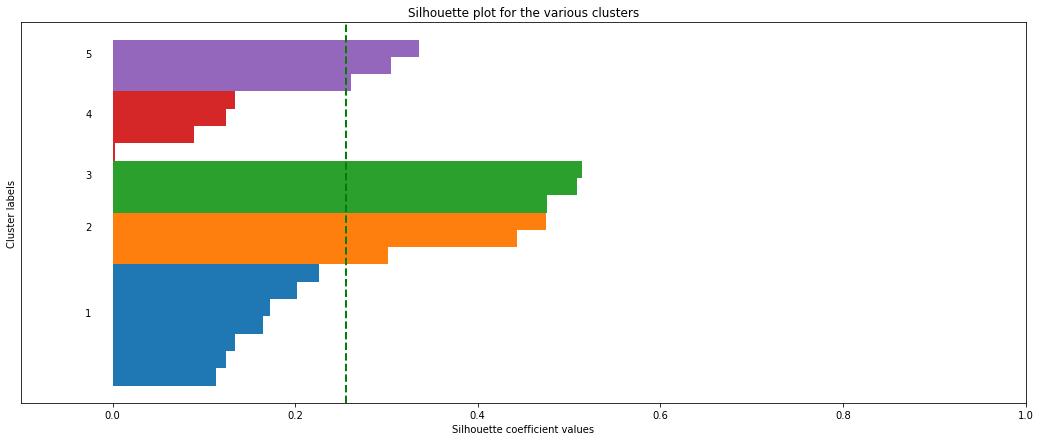

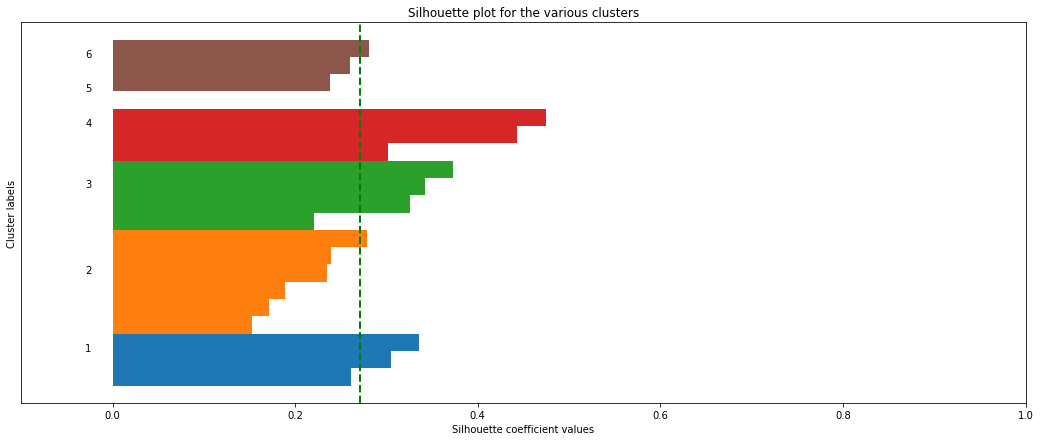

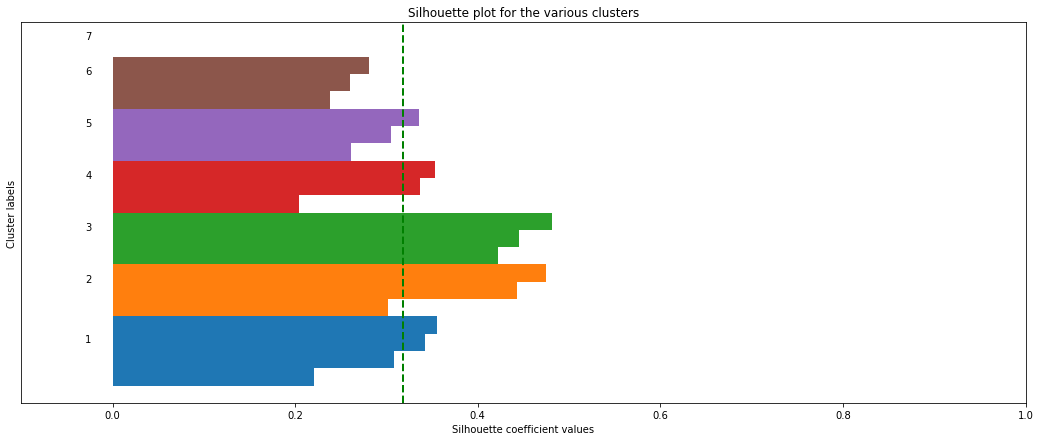

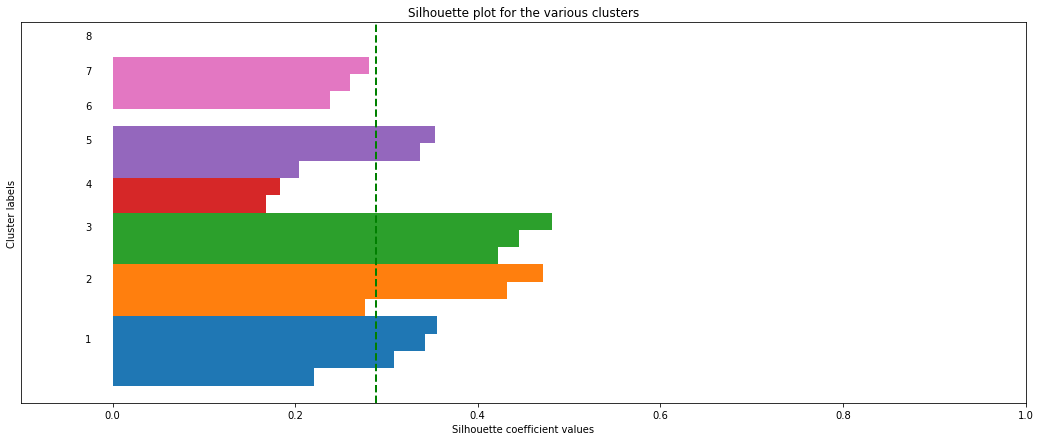

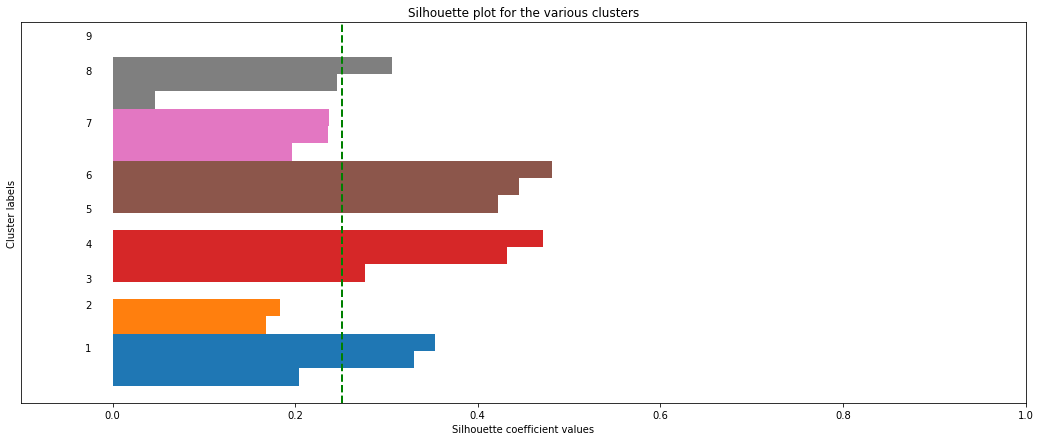

In [14]:
# 2.1 WITH KMeans

clustering_method = 'KMeans'
features = extracted_features


clusters_with_max_avg_score, max_avg_score = plot_avg_silhouette_score_and_get_cluster_with_max_score(clustering_method, features, clusters)
                                                                                                                     
print(f'With ResNet50 for features extraction, and KMeans, Clusters with max avg silhouette score {clusters_with_max_avg_score}, Max avg silouette score {max_avg_score}')

With ResNet50 for features extraction, and AgglomerativeClustering, Clusters with max avg silhouette score 7, Max avg silouette score 0.31846266984939575


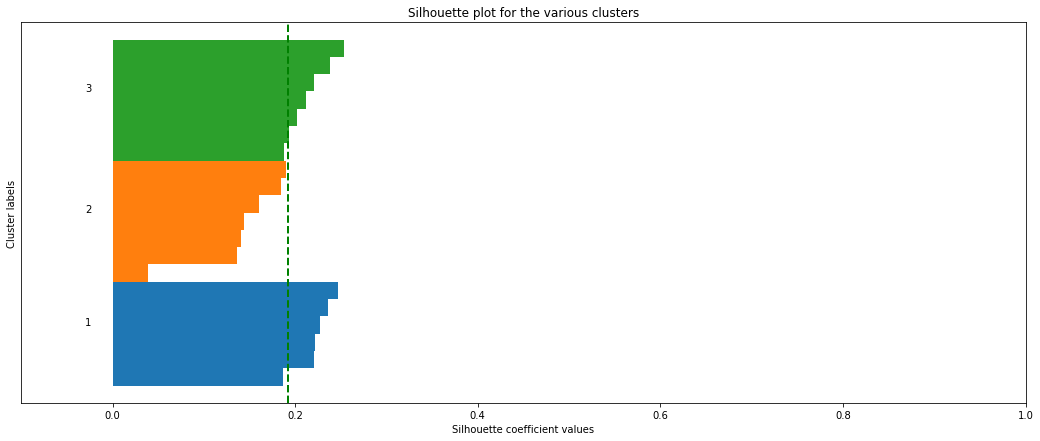

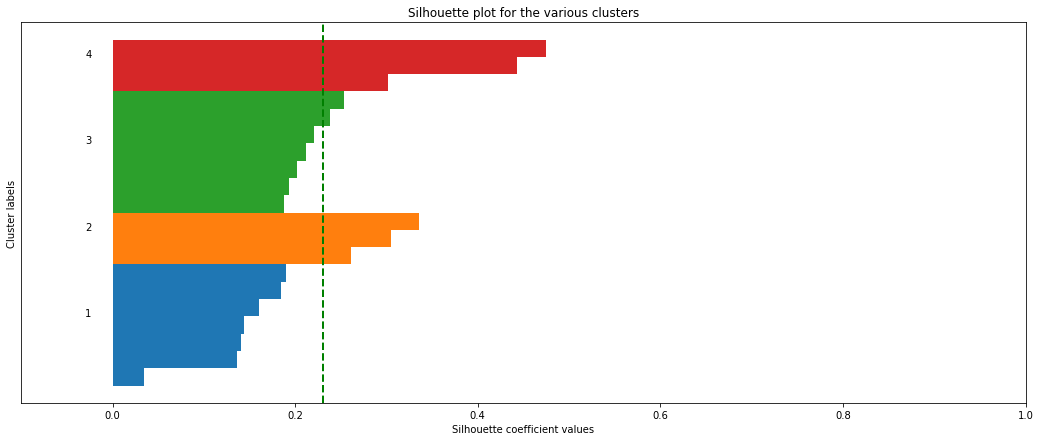

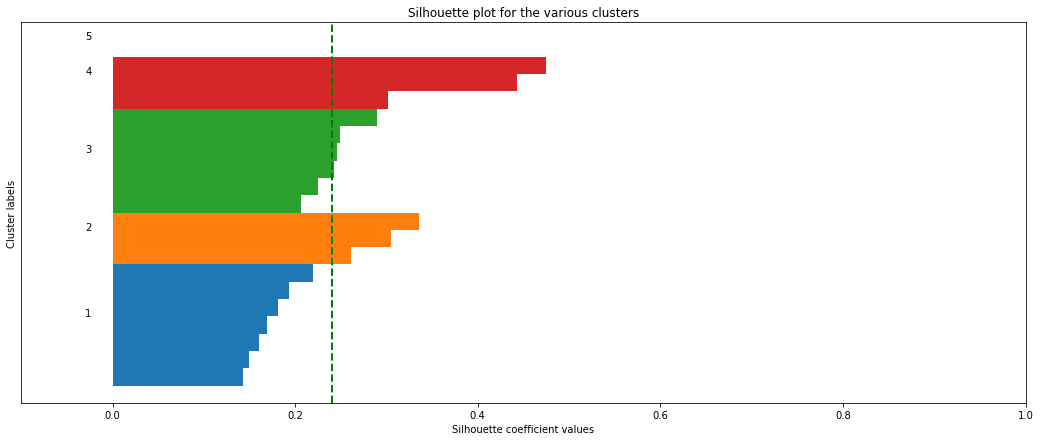

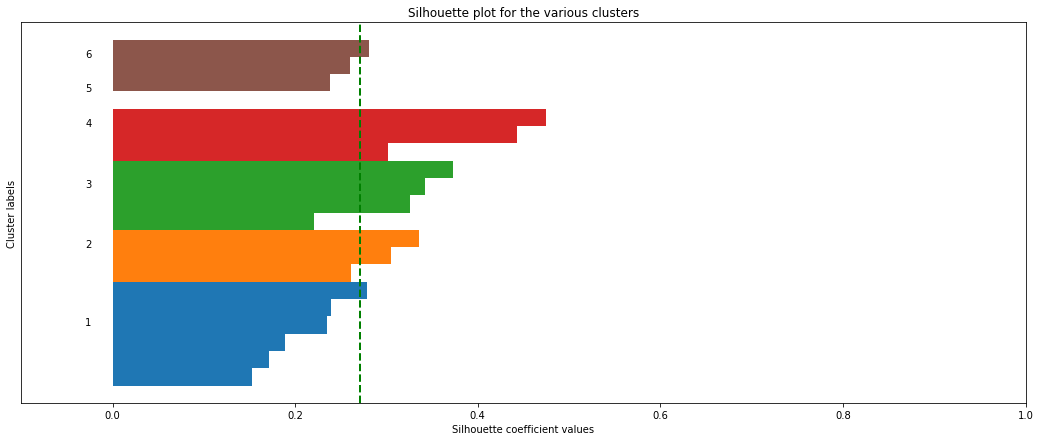

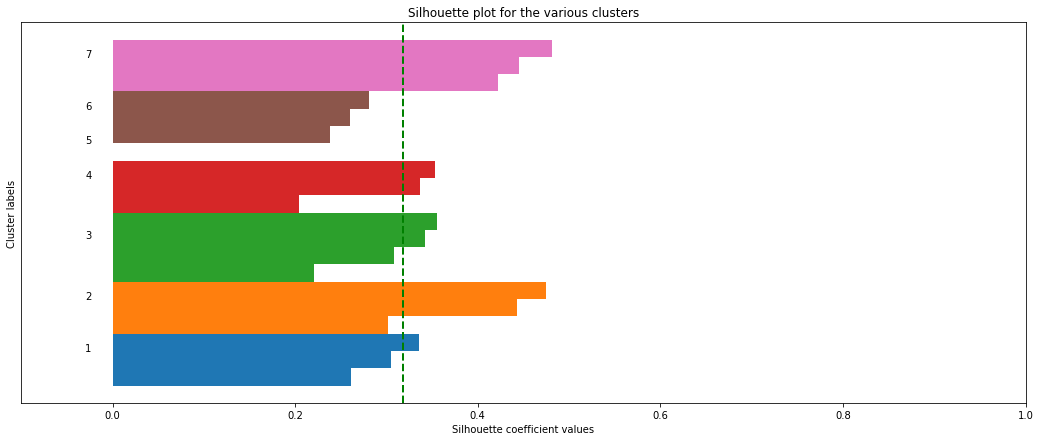

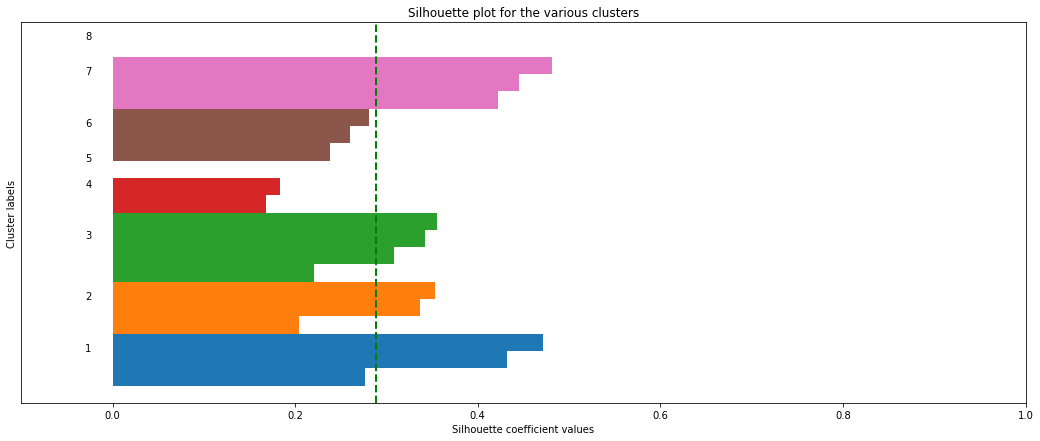

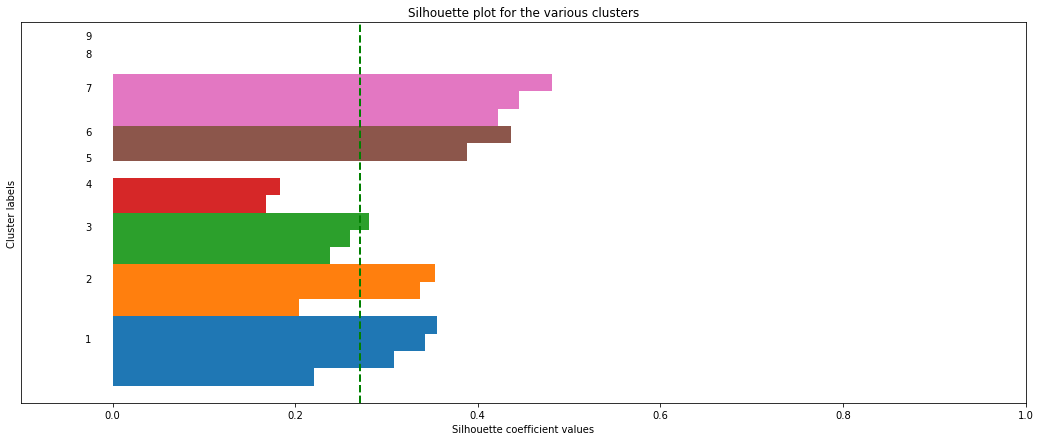

In [15]:
# 2.2 WITH AgglomerativeClustering

clustering_method = 'AgglomerativeClustering'
features = extracted_features


clusters_with_max_avg_score, max_avg_score = plot_avg_silhouette_score_and_get_cluster_with_max_score(clustering_method, features, clusters)

print(f'With ResNet50 for features extraction, and AgglomerativeClustering, Clusters with max avg silhouette score {clusters_with_max_avg_score}, Max avg silouette score {max_avg_score}')

In [16]:
# So it is clear that the if num of clusters = 7 and trained the model using ResNet50, it gives max the best sihouette score so far 
# and for both Kmeans and AgglomerativeClustering, so can use any one of them.

In [23]:
# So lets use AgglomerativeClustering

clusters = 7
features = extracted_features

predictions = pred_AgglomerativeClustering(clusters, features)


In [27]:
import os

img_dir_path = '/content/pics'
img_list = os.listdir(img_dir_path)

products = '/content/Products/'

for prediction, img in zip(predictions.tolist(), img_list):

  img_path = os.path.join(img_dir_path, img)
  product = os.path.join(products, 'Product' + str(prediction))

  if os.path.isdir(product) is not True:
    os.makedirs(product, exist_ok=True)

  !cp $img_path $product


